In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\bryan\Downloads\datasets\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [6]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [7]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [9]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [10]:
#To check missing data if any
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Text(0, 0.5, 'density')

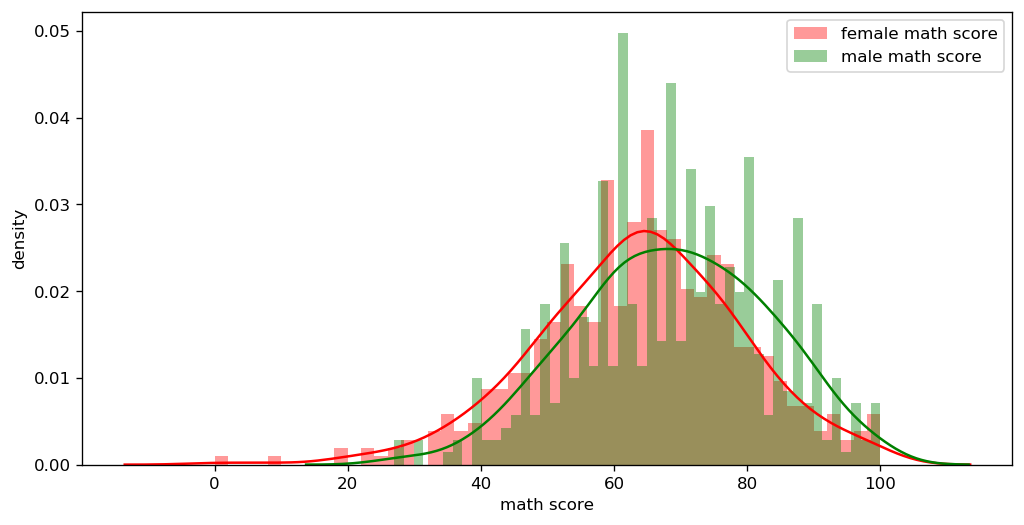

In [11]:
plt.figure(figsize=(10,5),dpi=120)
sns.distplot(df[df['gender']=='female']['math score'],bins=50,color='r',label='female math score')
sns.distplot(df[df['gender']=='male']['math score'],bins=50,color='g',label='male math score')
plt.legend()
plt.ylabel('density')

Text(0, 0.5, 'density')

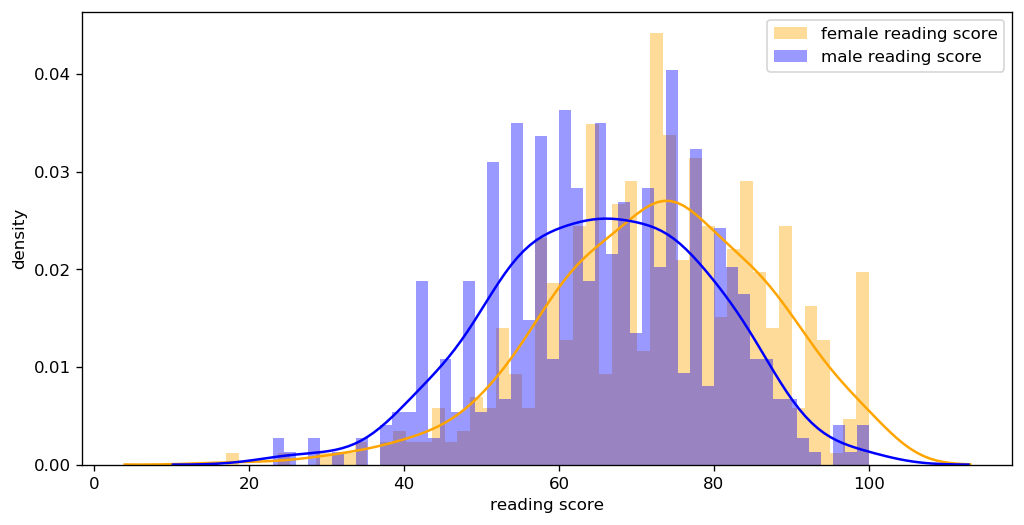

In [12]:
plt.figure(figsize=(10,5),dpi=120)
sns.distplot(df[df['gender']=='female']['reading score'],bins=50,color='orange',label='female reading score')
sns.distplot(df[df['gender']=='male']['reading score'],bins=50,color='blue',label='male reading score')
plt.legend()
plt.ylabel('density')

Text(0, 0.5, 'density')

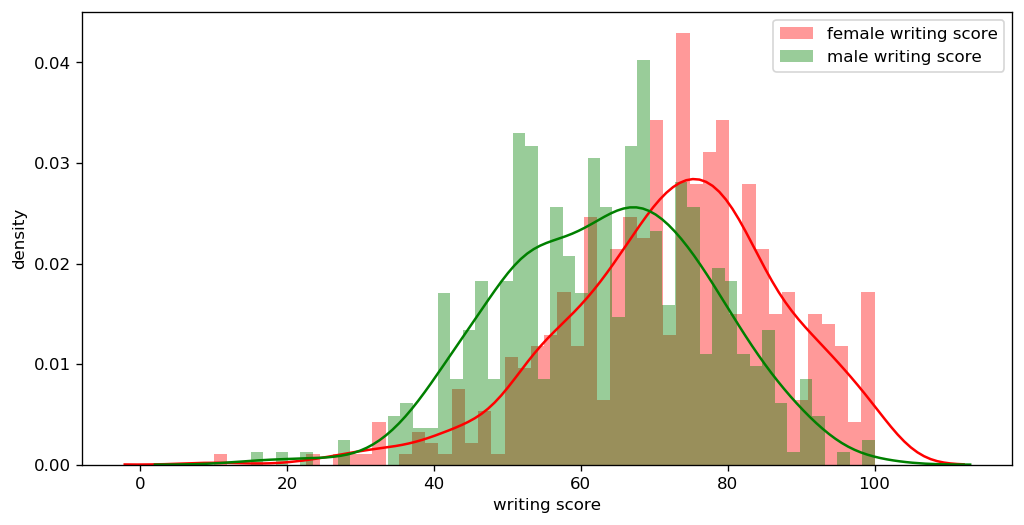

In [13]:
plt.figure(figsize=(10,5),dpi=120)
sns.distplot(df[df['gender']=='female']['writing score'],bins=50,color='r',label='female writing score')
sns.distplot(df[df['gender']=='male']['writing score'],bins=50,color='g',label='male writing score')
plt.legend()
plt.ylabel('density')

In [14]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


As can be seen from the above distribution plots and dataframe, males tend to have a better math score while females outperform the males on the reading an writing scores

In [15]:
#Creating a new feature which outputs the weighted average of the individual test scores
df['overall test score']=round((df['math score']+df['reading score']+df['writing score'])/3,2)
df['overall test score']

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: overall test score, Length: 1000, dtype: float64

Text(0, 0.5, 'density')

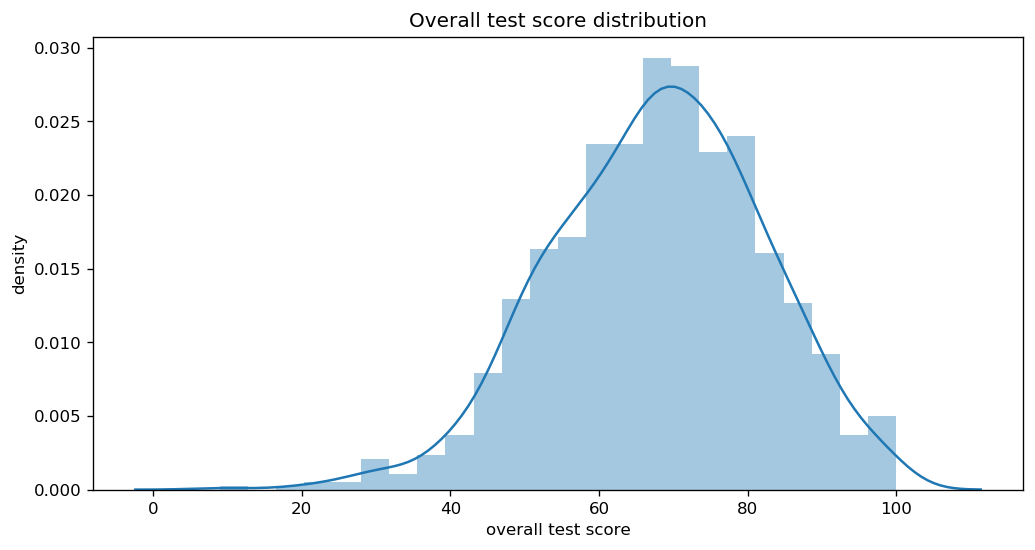

In [16]:
plt.figure(figsize=(10,5),dpi=120)
sns.distplot(df['overall test score'])
plt.title('Overall test score distribution')
plt.ylabel('density')

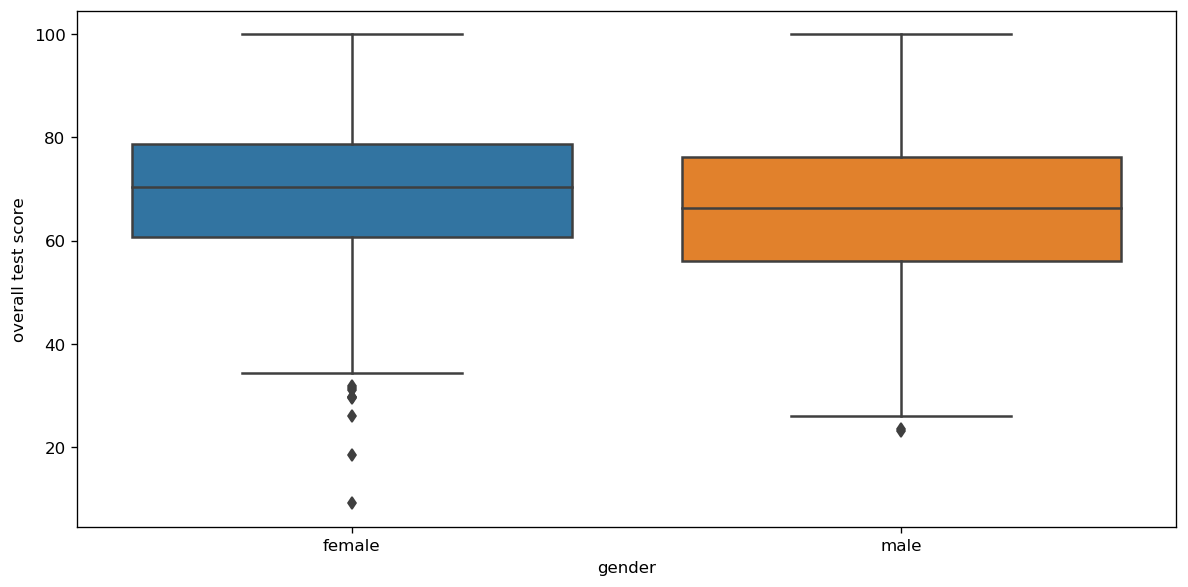

In [17]:
plt.figure(figsize=(10,5),dpi=120)
sns.boxplot(x='gender',y='overall test score',data=df)
plt.tight_layout()

From the above boxplot, outliers can be identified clearly on the basis of gender

In [18]:
#Calculating the three Quartiles of test scores for each gender
female_quarts=np.percentile(df[df['gender']=='female']['overall test score'], [25, 50, 75])
male_quarts=np.percentile(df[df['gender']=='male']['overall test score'], [25, 50, 75])

#Now using the IQR equation to calculate extreme values and identify outliers
female_iqr=female_quarts[2]-female_quarts[0]
male_iqr=male_quarts[2]-male_quarts[0]

#Finally to calculate the allowable extreme limits
female_upper_limit=female_quarts[2]+1.5*female_iqr
female_lower_limit=female_quarts[0]-1.5*female_iqr

male_upper_limit=male_quarts[2]+1.5*male_iqr
male_lower_limit=male_quarts[0]-1.5*male_iqr

print('Female overall score upper limit: ',female_upper_limit)
print('Female overall score lower limit: ',female_lower_limit)
print('male overall score upper limit: ',male_upper_limit)
print('male overall score lower limit: ',male_lower_limit)

Female overall score upper limit:  105.67
Female overall score lower limit:  33.67
male overall score upper limit:  106.61875
male overall score lower limit:  25.628749999999997


In [19]:
#Considering only the lower limits as a threshold for outliers
female_outliers=df[(df['gender']=='female') & (df['overall test score']<female_lower_limit)].index
male_outliers=df[(df['gender']=='male') & (df['overall test score']<male_lower_limit)].index

print(female_outliers)
print(male_outliers)

Int64Index([17, 59, 145, 338, 363, 466, 601, 787, 980], dtype='int64')
Int64Index([327, 596], dtype='int64')


In [20]:
df[(df['gender']=='female') & (df['overall test score']<38)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall test score
17,female,group B,some high school,free/reduced,none,18,32,28,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,9.00
145,female,group C,some college,free/reduced,none,22,39,33,31.33
338,female,group B,some high school,free/reduced,none,24,38,27,29.67
363,female,group D,some high school,free/reduced,none,27,34,32,31.00
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.67
555,female,group C,some college,free/reduced,none,32,39,33,34.67
601,female,group C,high school,standard,none,29,29,30,29.33
683,female,group C,some high school,free/reduced,completed,29,40,44,37.67
787,female,group B,some college,standard,none,19,38,32,29.67


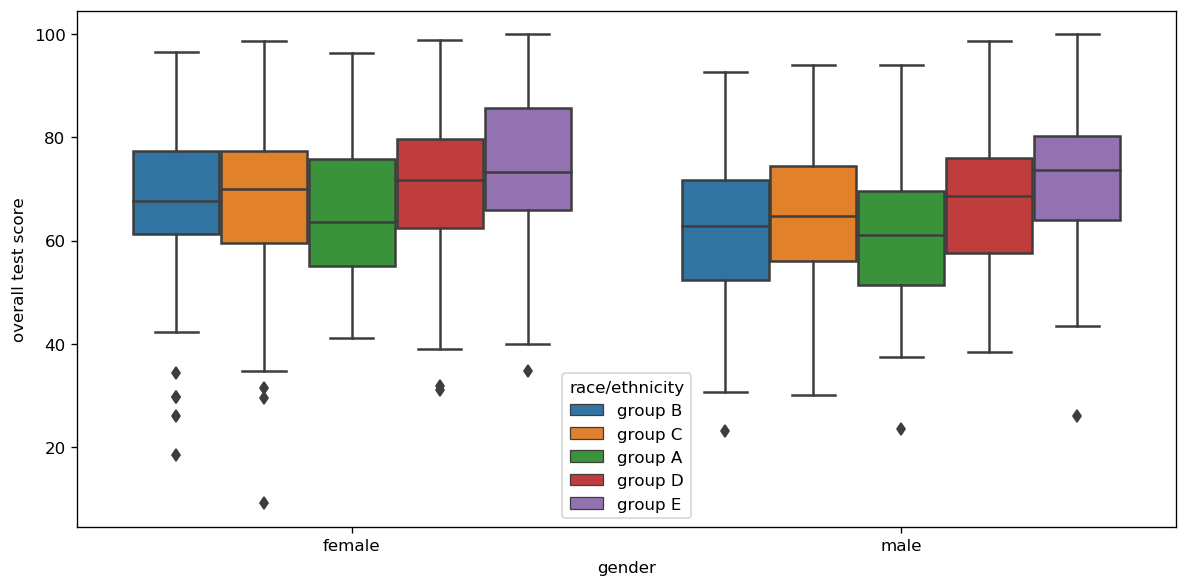

In [21]:
plt.figure(figsize=(10,5),dpi=120)
sns.boxplot(x='gender',y='overall test score',hue='race/ethnicity',data=df)
plt.tight_layout()

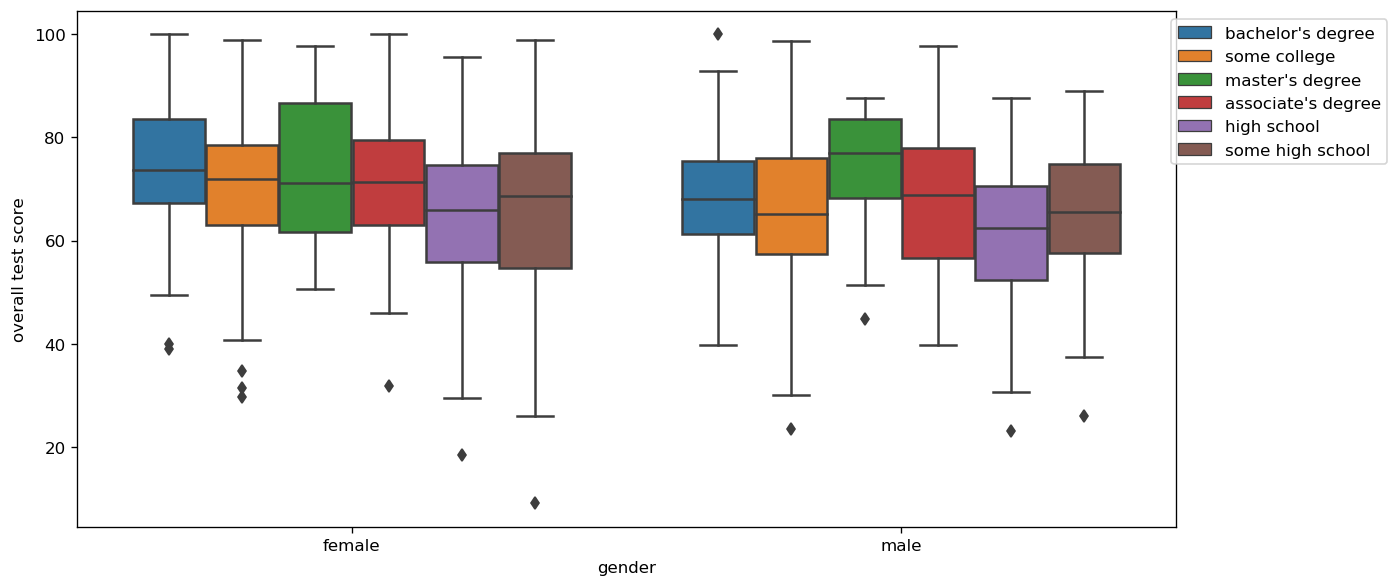

In [22]:
plt.figure(figsize=(10,5),dpi=120)
sns.boxplot(x='gender',y='overall test score',hue='parental level of education',data=df)
plt.tight_layout()
plt.legend(bbox_to_anchor= (1.2,1))

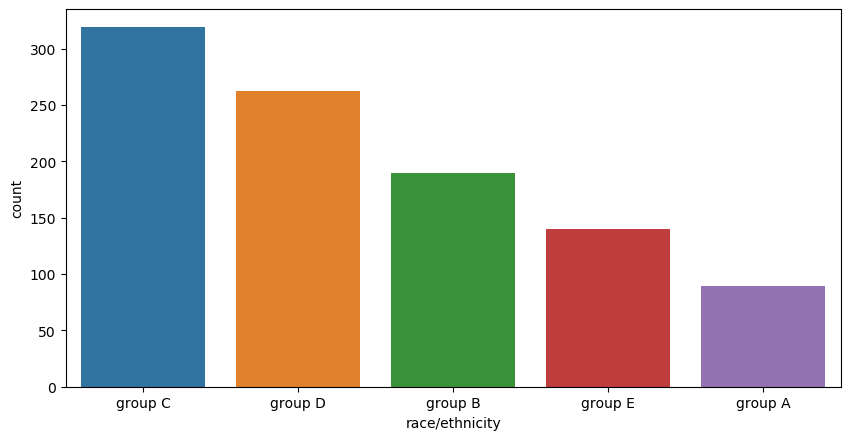

In [23]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(df['race/ethnicity'],order=df['race/ethnicity'].value_counts().index)

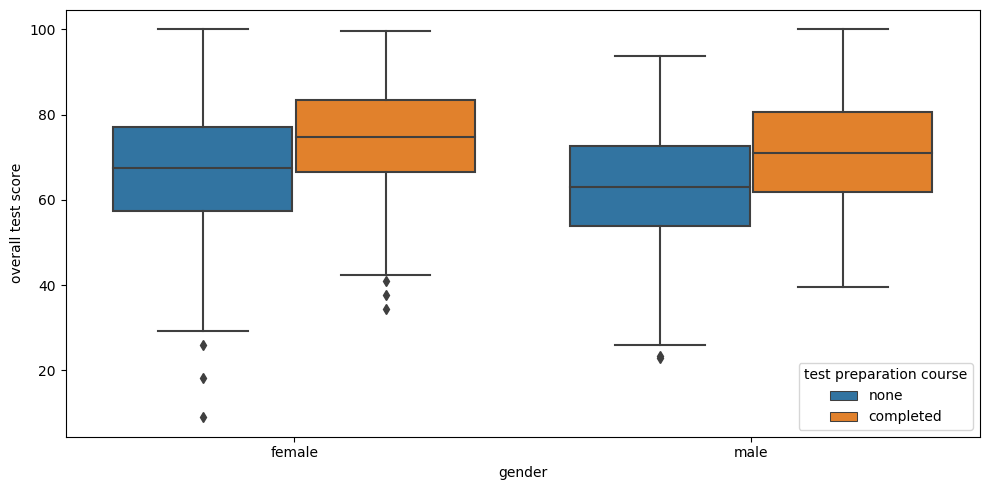

In [24]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='gender',y='overall test score',hue='test preparation course',data=df)
plt.tight_layout()

In [25]:
df.groupby(['race/ethnicity','parental level of education']).mean()

math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            writing score  overall test score  
race/ethnicity parental level of education                                     
group A        associate's degree               63.571429           63.880714  
               bachelor's degree                68.333333           67.861667  
               high school                      60.500000           61.278333  
               master's degree                  67.666667           63.333333  
               some college                     65.000000           64.887222  
               some high school                 58.583333           59.860417  
group B        associate's degree               68.243902           67.975610  
               bachelor's degree                71.650000           71.301500  
               high school                      61.250000           61.500000  
               master's degree                  77.166667           74.833333  
               some college                     64.189189           64.378649  
               some high school                 64.605263           64.289211  
group C        associate's degree               70.269231           69.376282  
               bachelor's degree                75.900000           73.241250  
               high school                      61.656250           62.328125  
               master's degree                  69.526316           69.034737  
               some college                     68.869565           67.806522  
               some high school                 63.285714           63.156327  
group D        associate's degree               69.860000           69.333400  
               bachelor's d

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

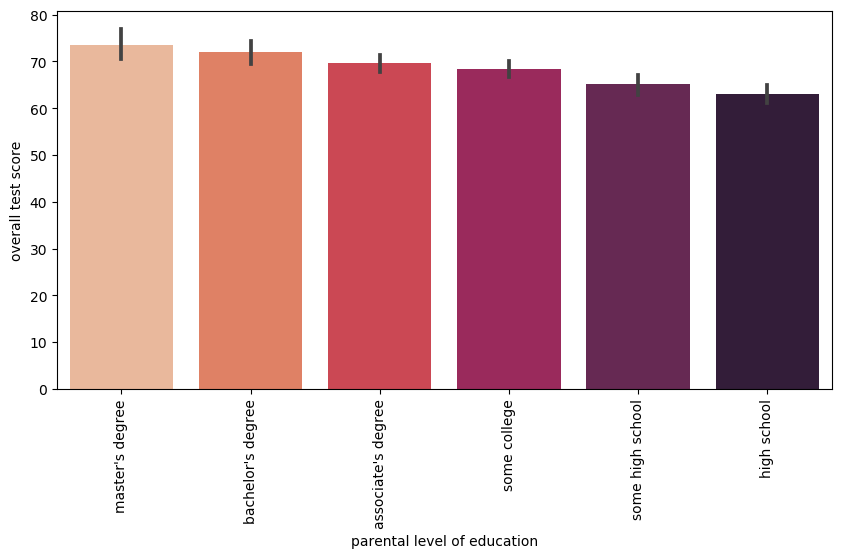

In [26]:
plt.figure(figsize=(10,5),dpi=100)
seq=pd.DataFrame(df.groupby('parental level of education').mean()['overall test score'].sort_values(ascending=False)).index
sns.barplot(x=df['parental level of education'],y=df['overall test score'],order=seq,palette='rocket_r')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

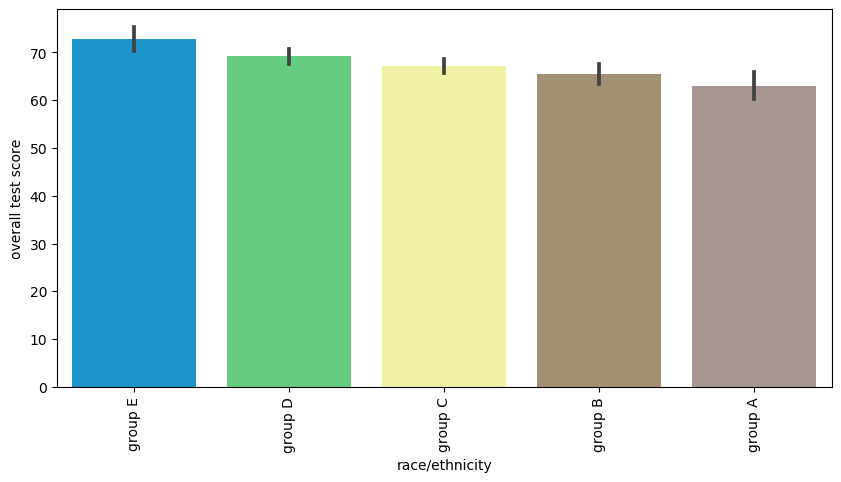

In [27]:
plt.figure(figsize=(10,5),dpi=100)
seq=pd.DataFrame(df.groupby('race/ethnicity').mean()['overall test score'].sort_values(ascending=False)).index
sns.barplot(x=df['race/ethnicity'],y=df['overall test score'],order=seq,palette='terrain')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

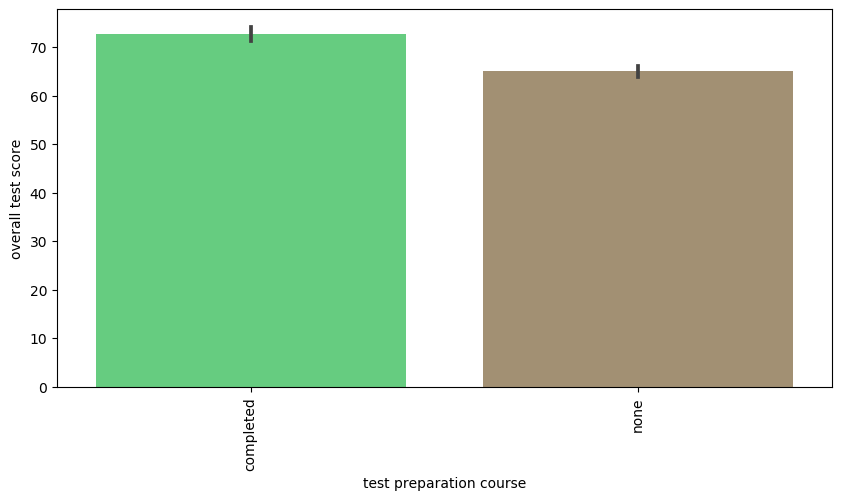

In [28]:
plt.figure(figsize=(10,5),dpi=100)
seq=pd.DataFrame(df.groupby('test preparation course').mean()['overall test score'].sort_values(ascending=False)).index
sns.barplot(x=df['test preparation course'],y=df['overall test score'],order=seq,palette='terrain')
plt.xticks(rotation=90)

# EDA Conclusions

**As can be seen from the above plots, parental education levels and race are a major factor in determining the test score of a student**

# Dealing with categorical features

In [29]:
gender_map={'female':1,'male':0}
df['gender']=df['gender'].map(gender_map)

lunch_map={'standard':1,'free/reduced':0}
prep_map={'none':0,'completed':1}

df['lunch']=df['lunch'].map(lunch_map)
df['test preparation course']=df['test preparation course'].map(prep_map)

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall test score
0,1,group B,bachelor's degree,1,0,72,72,74,72.67
1,1,group C,some college,1,1,69,90,88,82.33
2,1,group B,master's degree,1,0,90,95,93,92.67
3,0,group A,associate's degree,0,0,47,57,44,49.33
4,0,group C,some college,1,0,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,1,88,99,95,94.00
996,0,group C,high school,0,0,62,55,55,57.33
997,1,group C,high school,0,1,59,71,65,65.00
998,1,group D,some college,1,1,68,78,77,74.33


In [30]:
#creating a seperate dataframe to deal with categorical data

df=pd.get_dummies(df, columns=['race/ethnicity','parental level of education'])
df

,gender,lunch,test preparation course,math score,reading score,writing score,overall test score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,72,72,74,72.67,0,1,0,0,0,0,1,0,0,0,0
1,1,1,1,69,90,88,82.33,0,0,1,0,0,0,0,0,0,1,0
2,1,1,0,90,95,93,92.67,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,47,57,44,49.33,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,76,78,75,76.33,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,88,99,95,94.00,0,0,0,0,1,0,0,0,1,0,0
996,0,0,0,62,55,55,57.33,0,0,1,0,0,0,0,1,0,0,0
997,1,0,1,59,71,65,65.00,0,0,1,0,0,0,0,1,0,0,0
998,1,1,1,68,78,77,74.33,0,0,0,1,0,0,0,0,0,1,0


In [31]:
df.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score', 'overall test score',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender                                          1000 non-null   int64  
 1   lunch                                           1000 non-null   int64  
 2   test preparation course                         1000 non-null   int64  
 3   math score                                      1000 non-null   int64  
 4   reading score                                   1000 non-null   int64  
 5   writing score                                   1000 non-null   int64  
 6   overall test score                              1000 non-null   float64
 7   race/ethnicity_group A                          1000 non-null   uint8  
 8   race/ethnicity_group B                          1000 non-null   uint8  
 9   race/ethnicity_group C                    

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.51800,0.499926,0.0,0.00,1.00,1.00,1.0
lunch,1000.0,0.64500,0.478753,0.0,0.00,1.00,1.00,1.0
test preparation course,1000.0,0.35800,0.479652,0.0,0.00,0.00,1.00,1.0
math score,1000.0,66.08900,15.163080,0.0,57.00,66.00,77.00,100.0
reading score,1000.0,69.16900,14.600192,17.0,59.00,70.00,79.00,100.0
writing score,1000.0,68.05400,15.195657,10.0,57.75,69.00,79.00,100.0
overall test score,1000.0,67.77058,14.257311,9.0,58.33,68.33,77.67,100.0
race/ethnicity_group A,1000.0,0.08900,0.284886,0.0,0.00,0.00,0.00,1.0
race/ethnicity_group B,1000.0,0.19000,0.392497,0.0,0.00,0.00,0.00,1.0
race/ethnicity_group C,1000.0,0.31900,0.466322,0.0,0.00,0.00,1.00,1.0


# Testing the performance of a simple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

The model is designed to predict only the Overall test scores

In [35]:
df_model=df.drop(['math score','reading score','writing score'],axis=1)
df_model

,gender,lunch,test preparation course,overall test score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,72.67,0,1,0,0,0,0,1,0,0,0,0
1,1,1,1,82.33,0,0,1,0,0,0,0,0,0,1,0
2,1,1,0,92.67,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,49.33,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,76.33,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,94.00,0,0,0,0,1,0,0,0,1,0,0
996,0,0,0,57.33,0,0,1,0,0,0,0,1,0,0,0
997,1,0,1,65.00,0,0,1,0,0,0,0,1,0,0,0
998,1,1,1,74.33,0,0,0,1,0,0,0,0,0,1,0


In [36]:
x=df_model.drop('overall test score',axis=1)
y=df_model['overall test score']

In [37]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [38]:
lr=LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=101)

In [39]:
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

In [40]:
print('Initial model Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,y_pred)))
print('Initial model R^2:', r2_score(ytest,y_pred))

Initial model Root Mean Squared Error: 12.516749115985947
Initial model R^2: 0.16442688170101938


*Now re-running the algorithm after dropping the outliers*

In [41]:
#Outlier indices
outliers=female_outliers.append(male_outliers)
outliers

Int64Index([17, 59, 145, 338, 363, 466, 601, 787, 980, 327, 596], dtype='int64')

In [42]:
df.iloc[outliers]

,gender,lunch,test preparation course,math score,reading score,writing score,overall test score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
17,1,0,0,18,32,28,26.00,0,1,0,0,0,0,0,0,0,0,1
59,1,0,0,0,17,10,9.00,0,0,1,0,0,0,0,0,0,0,1
145,1,0,0,22,39,33,31.33,0,0,1,0,0,0,0,0,0,1,0
338,1,0,0,24,38,27,29.67,0,1,0,0,0,0,0,0,0,0,1
363,1,0,0,27,34,32,31.00,0,0,0,1,0,0,0,0,0,0,1
466,1,0,0,26,31,38,31.67,0,0,0,1,0,1,0,0,0,0,0
601,1,1,0,29,29,30,29.33,0,0,1,0,0,0,0,1,0,0,0
787,1,1,0,19,38,32,29.67,0,1,0,0,0,0,0,0,0,1,0
980,1,0,0,8,24,23,18.33,0,1,0,0,0,0,0,1,0,0,0
327,0,0,0,28,23,19,23.33,1,0,0,0,0,0,0,0,0,1,0


In [43]:
#final dataframe without outliers
df_model=df.drop(['math score','reading score','writing score'],axis=1)
df_model=df_model.drop(index=outliers)
df_model

,gender,lunch,test preparation course,overall test score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,72.67,0,1,0,0,0,0,1,0,0,0,0
1,1,1,1,82.33,0,0,1,0,0,0,0,0,0,1,0
2,1,1,0,92.67,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,49.33,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,76.33,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,94.00,0,0,0,0,1,0,0,0,1,0,0
996,0,0,0,57.33,0,0,1,0,0,0,0,1,0,0,0
997,1,0,1,65.00,0,0,1,0,0,0,0,1,0,0,0
998,1,1,1,74.33,0,0,0,1,0,0,0,0,0,1,0


In [44]:
x=df_model.drop('overall test score',axis=1)
y=df_model['overall test score']
x_scaled=scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=101)

Ridge Regression Model

In [45]:
ridge=Ridge()
params={'alpha':[0.001,0.01,0.1,0.5,1],'max_iter':[1000,10000,100000]}
grid=GridSearchCV(estimator=ridge,param_grid=params,cv=5,verbose=1)

In [46]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1],
                         'max_iter': [1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [47]:
grid.best_params_

{'alpha': 1, 'max_iter': 1000}

In [48]:
grid.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [49]:
y_hat_ridge=grid.predict(xtest)

In [50]:
print('Ridge model Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,y_hat_ridge)))
print('Ridge model R^2:', r2_score(ytest,y_hat_ridge))

Ridge model Root Mean Squared Error: 12.511658221129967
Ridge model R^2: 0.18755571111631142


Since regression offers poor performance, we can examine the performance of classification algorithms

# Trying out classification algorithms

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

To classify the overall test score, we can divide it into grades 

In [52]:
#creating a function to set grades based on the overall score
def grade(score):
    if score>=90:
        return 'A'
    elif score<90 and score>=80:
        return 'B'
    elif score<80 and score>=70:
        return 'C'
    elif score<70 and score>=60:
        return 'D'
    elif score<60 and score>=50:
        return 'E'
    else:
        return 'F'

In [53]:
df['grade']=df['overall test score'].apply(grade)
df['grade'].value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: grade, dtype: int64

In [54]:
df

,gender,lunch,test preparation course,math score,reading score,writing score,overall test score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,grade
0,1,1,0,72,72,74,72.67,0,1,0,0,0,0,1,0,0,0,0,C
1,1,1,1,69,90,88,82.33,0,0,1,0,0,0,0,0,0,1,0,B
2,1,1,0,90,95,93,92.67,0,1,0,0,0,0,0,0,1,0,0,A
3,0,0,0,47,57,44,49.33,1,0,0,0,0,1,0,0,0,0,0,F
4,0,1,0,76,78,75,76.33,0,0,1,0,0,0,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,88,99,95,94.00,0,0,0,0,1,0,0,0,1,0,0,A
996,0,0,0,62,55,55,57.33,0,0,1,0,0,0,0,1,0,0,0,E
997,1,0,1,59,71,65,65.00,0,0,1,0,0,0,0,1,0,0,0,D
998,1,1,1,68,78,77,74.33,0,0,0,1,0,0,0,0,0,1,0,C


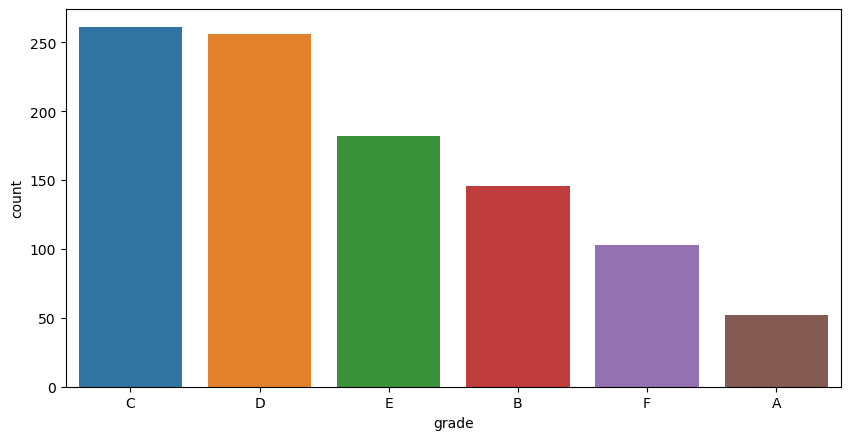

In [55]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(df['grade'],order=df['grade'].value_counts().index)

In [56]:
df_model=df.drop(['math score','reading score','writing score','overall test score'],axis=1)
df_model=df_model.drop(index=outliers)
df_model

,gender,lunch,test preparation course,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,grade
0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,C
1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,B
2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,A
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,F
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,0,0,0,1,0,0,0,1,0,0,A
996,0,0,0,0,0,1,0,0,0,0,1,0,0,0,E
997,1,0,1,0,0,1,0,0,0,0,1,0,0,0,D
998,1,1,1,0,0,0,1,0,0,0,0,0,1,0,C


**Logistic Regression**

In [57]:
log=LogisticRegression()
params={'C':[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,1.5,2],'solver':['lbfgs','sag', 'saga', 'newton-cg'],'max_iter':[1000,10000,50000]}
grid=GridSearchCV(estimator=log,param_grid=params,cv=5,verbose=1)

In [58]:
x=df_model.drop('grade',axis=1)
y=df_model['grade']

In [59]:
 xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=101)

In [60]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01,
                               0.05, 0.1, 0.5, 1, 1.5, 2],
                         'max_iter': [1000, 10000, 50000],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [61]:
grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}

In [62]:
ypred_log=grid.predict(xtest)

In [63]:
#Classification confusion matrix
print(confusion_matrix(ytest,ypred_log))

[[ 0  0 11  1  0  0]
 [ 0  0 36 10  0  0]
 [ 0  0 37 10  3  0]
 [ 0  0 38 22 10  0]
 [ 0  0 20 13 11  0]
 [ 0  0 12 10  4  0]]


In [64]:
print(classification_report(ytest,ypred_log))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        12
           B       0.00      0.00      0.00        46
           C       0.24      0.74      0.36        50
           D       0.33      0.31      0.32        70
           E       0.39      0.25      0.31        44
           F       0.00      0.00      0.00        26

    accuracy                           0.28       248
   macro avg       0.16      0.22      0.17       248
weighted avg       0.21      0.28      0.22       248



C:\Users\bryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print('F1 score for Logistic Regression: ',f1_score(ytest,ypred_log,average='micro'))

F1 score for Logistic Regression:  0.28225806451612906


Text(0.5, 0, 'Predicted label')

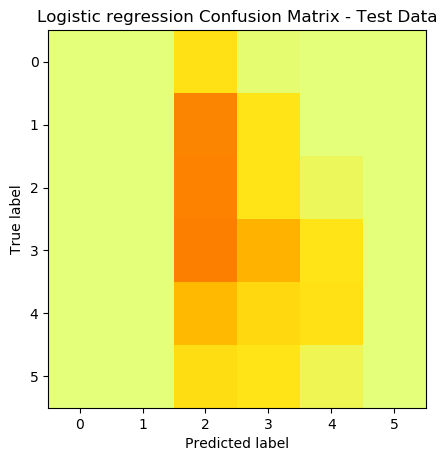

In [66]:
plt.figure(figsize=(10,5),dpi=100)
plt.imshow(confusion_matrix(ytest,ypred_log), interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Logistic regression Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In the above plot, the darker color represents the extent of wrong classification

**K Nearest Neighbors**

In [67]:
knn=KNeighborsClassifier()
params={'n_neighbors':range(1,50),'weights':['uniform','distance'],'algorithm':['ball_tree', 'kd_tree', 'brute']}
grid=GridSearchCV(estimator=knn,param_grid=params,cv=5,verbose=1)

In [68]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [69]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 40, 'weights': 'uniform'}

In [70]:
ypred_knn=grid.predict(xtest)

In [71]:
confusion_matrix(ytest,ypred_knn)

array([[ 0,  0, 10,  2,  0,  0],
       [ 2,  1, 31, 11,  1,  0],
       [ 0,  1, 35, 11,  2,  1],
       [ 0,  3, 31, 25,  9,  2],
       [ 0,  0, 21, 13,  6,  4],
       [ 0,  0, 10, 12,  3,  1]], dtype=int64)

In [72]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        12
           B       0.20      0.02      0.04        46
           C       0.25      0.70      0.37        50
           D       0.34      0.36      0.35        70
           E       0.29      0.14      0.18        44
           F       0.12      0.04      0.06        26

    accuracy                           0.27       248
   macro avg       0.20      0.21      0.17       248
weighted avg       0.25      0.27      0.22       248



In [73]:
print('F1 score for KNN: ',f1_score(ytest,ypred_knn,average='micro'))

F1 score for KNN:  0.27419354838709675


Text(0.5, 0, 'Predicted label')

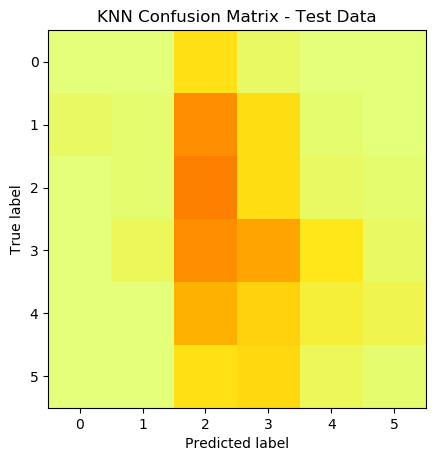

In [74]:
plt.figure(figsize=(10,5),dpi=100)
plt.imshow(confusion_matrix(ytest,ypred_knn), interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('KNN Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

**SVC Classifier**

In [75]:
svc=SVC(C=0.00001,gamma=0.01,kernel='rbf')
svc.fit(xtrain,ytrain)

SVC(C=1e-05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
yhat=svc.predict(xtest)
accuracy_score(ytest,yhat)

0.20161290322580644

Hyperparameter Tuning

In [77]:
svc=SVC()
params={'C':[0.0001,0.001,0.01,0.1,1,1.1,10],'gamma':[0.0001, 0.001, 0.01, 0.1,1,1.1],'kernel':['poly', 'rbf', 'sigmoid'],'max_iter':[100000],'degree':[1,2,4,6,8,10]}
grid=GridSearchCV(estimator=svc,param_grid=params,cv=5,refit=True,verbose=0)

In [78]:
grid.fit(xtrain,ytrain)

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 10],
                         'degree': [1, 2, 4, 6, 8, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 1.1],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'max_iter': [100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 1.1, 'kernel': 'poly', 'max_iter': 100000}

In [80]:
ypred_svc=grid.predict(xtest)

In [81]:
confusion_matrix(ytest,ypred_svc)

array([[ 0,  0,  9,  3,  0,  0],
       [ 0,  0, 36,  7,  3,  0],
       [ 0,  0, 36,  7,  7,  0],
       [ 0,  0, 36, 14, 20,  0],
       [ 0,  0, 19,  5, 20,  0],
       [ 0,  0, 12,  6,  8,  0]], dtype=int64)

In [82]:
print(classification_report(ytest,ypred_svc))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        12
           B       0.00      0.00      0.00        46
           C       0.24      0.72      0.36        50
           D       0.33      0.20      0.25        70
           E       0.34      0.45      0.39        44
           F       0.00      0.00      0.00        26

    accuracy                           0.28       248
   macro avg       0.15      0.23      0.17       248
weighted avg       0.20      0.28      0.21       248



C:\Users\bryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'Predicted label')

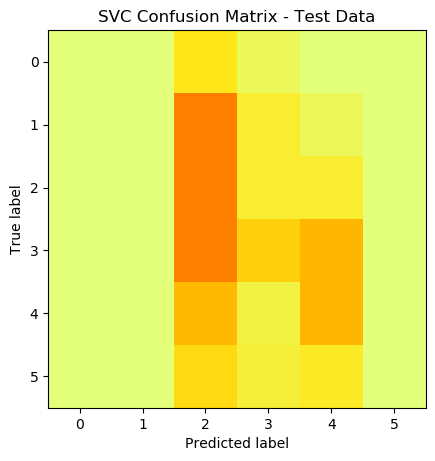

In [83]:
plt.figure(figsize=(10,5),dpi=100)
plt.imshow(confusion_matrix(ytest,ypred_svc), interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('SVC Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [84]:
print('F1 score for SVC: ',f1_score(ytest,ypred_svc,average='micro'))

F1 score for SVC:  0.28225806451612906


**Decision Tree Classifier**

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree=DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],'max_depth':range(1,150)}
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)

In [87]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [88]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [89]:
ypred_tree=grid.predict(xtest)

In [90]:
confusion_matrix(ytest,ypred_tree)

array([[ 0,  0, 12,  0,  0,  0],
       [ 0,  0, 42,  0,  4,  0],
       [ 0,  0, 44,  0,  6,  0],
       [ 0,  0, 55,  0, 15,  0],
       [ 0,  0, 26,  0, 18,  0],
       [ 0,  0, 17,  0,  9,  0]], dtype=int64)

In [91]:
print(classification_report(ytest,ypred_tree))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        12
           B       0.00      0.00      0.00        46
           C       0.22      0.88      0.36        50
           D       0.00      0.00      0.00        70
           E       0.35      0.41      0.38        44
           F       0.00      0.00      0.00        26

    accuracy                           0.25       248
   macro avg       0.10      0.21      0.12       248
weighted avg       0.11      0.25      0.14       248



C:\Users\bryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print('F1 score for Decision Tree: ',f1_score(ytest,ypred_tree,average='micro'))

F1 score for Decision Tree:  0.25


Text(0.5, 0, 'Predicted label')

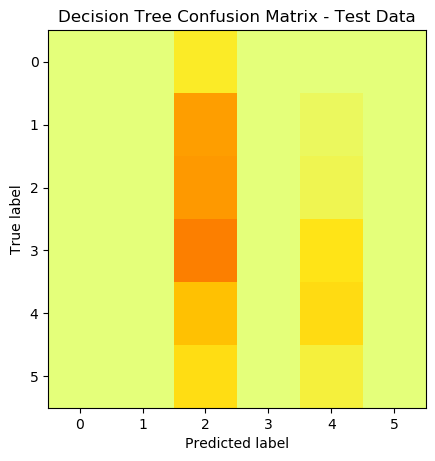

In [93]:
plt.figure(figsize=(10,5),dpi=100)
plt.imshow(confusion_matrix(ytest,ypred_tree), interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Decision Tree Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [94]:
print('CLassification Algorithm Output:' '\n')
print('F1 score for Logistic Regression: ',f1_score(ytest,ypred_log,average='micro'))
print('F1 score for KNN: ',f1_score(ytest,ypred_knn,average='micro'))
print('F1 score for SVC: ',f1_score(ytest,ypred_svc,average='micro'))
print('F1 score for Decision Tree: ',f1_score(ytest,ypred_tree,average='micro'))

CLassification Algorithm Output:

F1 score for Logistic Regression:  0.28225806451612906
F1 score for KNN:  0.27419354838709675
F1 score for SVC:  0.28225806451612906
F1 score for Decision Tree:  0.25


# Model Conclusions

The aim of this project was to visualize and model the importance of characteristics such as parental education, race, gender and test preparedness in determining the test scores of students.

Since the R-square value for the Ridge regression model is very low - only *0.1876*, classification algorithms were employed to predict the grade for each student. For this, the overall scores were categorized into grades to transform the data to a format suitable for classification algorithms. 

However, even the classification models performed poorly, the best being Logistic Regression and the SVC Classifier with an accuracy of only *28.223%*